### Notes :
#### <font color="red">Modèle linéaire</font>
- Les tests KO n'ont pas été résolus 
- erreur de compilation (Visual Studio) pour les cas test 3D, cepandant on a bien les plots qui s'affichent

***

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *

In [2]:
path_to_ml_dll = "C:/Users/Maathess/Desktop/IMDB_git/ML/cmake-build-debug/ml_lib.dll"
ml = cdll.LoadLibrary(path_to_ml_dll)

In [10]:
path_to_pmc_dll = "C:/Users/gautier/CLionProjects/MLP3/cmake-build-debug/libMLP3.dll"
my_lib = cdll.LoadLibrary(path_to_pmc_dll)

In [3]:
#INITIALISATION DES ENTREES/SORTIES
ml.create_linear_model.argtypes = [c_int]
ml.create_linear_model.restype = POINTER(c_float)


ml.destroy_linear_model.argtypes = [POINTER(c_float)]
ml.destroy_linear_model.restype = None

## <center>Classification</center>

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [4]:
X = np.array([
      [2.5, 5],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

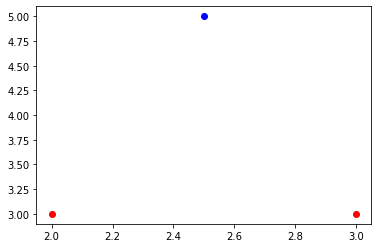

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### <font color='red'><center>**Modèle linéaire**</center></font>

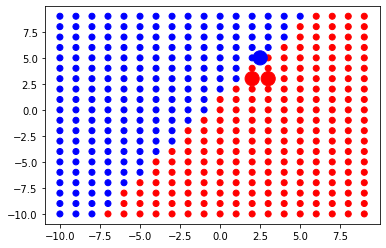

In [14]:
X = np.array([
      [2.5, 5],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

model = ml.create_linear_model(2)

test_dataset_inputs = [[x1, x2] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
#inputs
flattened_df_inputs = c_float * len(flattened_dataset_inputs)
arr_inputs = flattened_df_inputs(*flattened_dataset_inputs)

#outputs
flattened_df_outputs = c_float * len(Y)
arr_outputs = flattened_df_outputs(*Y)

ml.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), flattened_df_inputs, flattened_df_outputs, c_float, c_int, c_int]
ml.train_classification_rosenblatt_rule_linear_model.restype = None
ml.train_classification_rosenblatt_rule_linear_model(model, arr_inputs, arr_outputs, 0.001, 10000,len(flattened_dataset_inputs))

predicted_outputs = []
for p in test_dataset:
    arr_res1 = c_float * len(p)
    arr_res2 = arr_res1(*p)

    ml.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_res1]
    ml.predict_linear_model_classification.restype = c_float
    curr = ml.predict_linear_model_classification(model, arr_res2)
    predicted_outputs.append(curr)

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()
    
ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

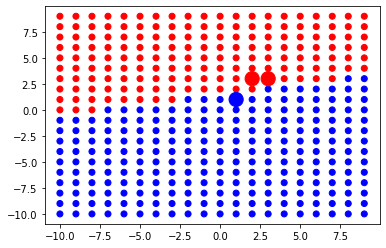

In [11]:
dataset_inputs = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
])
dataset_expected_outputs = np.array([
    1,
    -1,
    -1
])

init_tab = [2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
test_dataset = [[x1, x2] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]
my_lib.getXSize.argtypes = [c_void_p]
my_lib.restype = c_int
tmp_len = my_lib.getXSize(model)
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                      array_type_exp, c_float, c_int]
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                          0.001, 100000)
predicted_outputs = []
for p in test_dataset:
    array_size_P = len(p)
    array_type_P = c_float * array_size_P
    array_P = array_type_P(*p)
    my_lib.predict_mlp_model_classification.argtypes = [c_void_p, array_type_P]
    my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_classification(model, array_P)
    np_array = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_array[0])
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

***

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [15]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

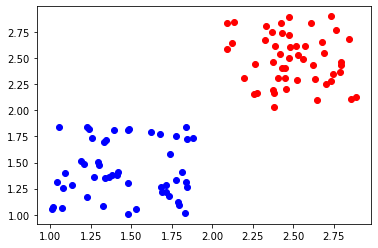

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### <font color='red'><center>**Modèle linéaire**</center></font>

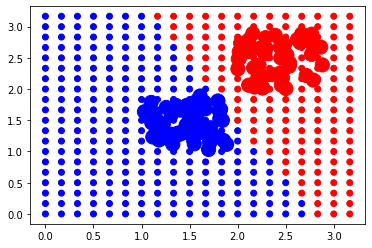

<Figure size 432x288 with 0 Axes>

In [17]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])    
    
model = ml.create_linear_model(2)
test_dataset = [[float(x1)/6, float(x2)/6] for x1 in range(0, 20) for x2 in range(0, 20)] #out of range if x > 6
colors = ["blue" if output >= 0 else "red" for output in Y]

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(Y)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*Y)

ml.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_float, c_int, c_int]
ml.train_classification_rosenblatt_rule_linear_model.restype = None
ml.train_classification_rosenblatt_rule_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs, 0.001, 10000, len(flattened_dataset_inputs))

predicted_outputs = []
for p in test_dataset:
    predicted_outputs_type = c_float * len(p)
    arr_predicted_outputs = predicted_outputs_type(*p)
    
    ml.predict_linear_model_classification.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_classification.restype = c_float

    d = ml.predict_linear_model_classification(model, arr_predicted_outputs)
    predicted_outputs.append(d)

predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c= colors, s= 200)
plt.show()
plt.clf()

ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

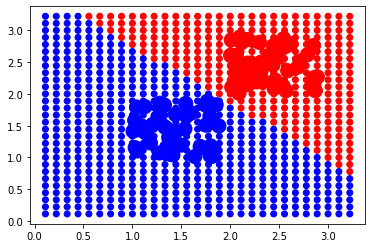

In [12]:
dataset_inputs = np.concatenate([np.random.random((50, 2)) * 0.9 + np.array([1, 1]), np.random.random((50, 2)) * 0.9 + np.array([2, 2])])
dataset_expected_outputs = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])
init_tab = [2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 9, x2 / 9] for x1 in range(1, 30) for x2 in range(1, 30)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]
my_lib.getXSize.argtypes = [c_void_p]
my_lib.restype = c_int
tmp_len = my_lib.getXSize(model)
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                      array_type_exp, c_float, c_int]
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                          0.001, 100000)
predicted_outputs = []
for p in test_dataset:
    array_sizeP = len(p)
    array_typeP = c_float * array_sizeP
    array_P = array_typeP(*p)
    my_lib.predict_mlp_model_classification.argtypes = [c_void_p, array_typeP]
    my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_classification(model, array_P)
    np_array = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_array[0])
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

***

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [18]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

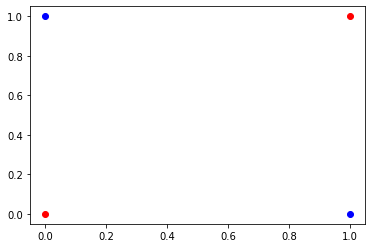

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### <font color='red'><center>**Modèle linéaire**</center></font>

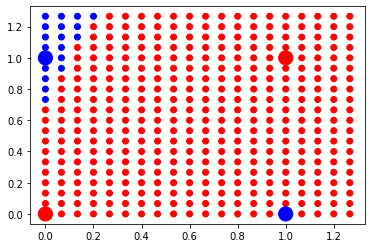

<Figure size 432x288 with 0 Axes>

In [20]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

model = ml.create_linear_model(2)

test_dataset = [[x1/15, x2/15] for x1 in range(0, 20) for x2 in range(0, 20)]
colors = ["blue" if output >= 0 else "red" for output in Y]

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(Y)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*Y)

ml.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_float, c_int, c_int]
ml.train_classification_rosenblatt_rule_linear_model.restype = None
ml.train_classification_rosenblatt_rule_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs, 0.001, 10000, len(flattened_dataset_inputs))

predicted_outputs = []
for p in test_dataset:
    predicted_outputs_type = c_float * len(p)
    arr_predicted_outputs = predicted_outputs_type(*p)
    ml.predict_linear_model_classification.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_classification.restype = c_float

    d = ml.predict_linear_model_classification(model, arr_predicted_outputs)
    predicted_outputs.append(d)
 
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c= colors, s= 200)
plt.show()
plt.clf()

ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

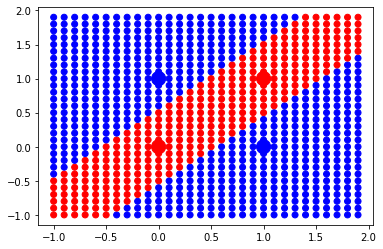

In [13]:
dataset_inputs = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
dataset_expected_outputs = np.array([1, 1, -1, -1])
init_tab = [2, 2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]
my_lib.getXSize.argtypes = [c_void_p]
my_lib.restype = c_int
tmp_len = my_lib.getXSize(model)
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                      array_type_exp, c_float, c_int]
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                          0.001, 100000)
predicted_outputs = []
for p in test_dataset:
    array_size_P = len(p)
    array_type_P = c_float * array_size_P
    array_P = array_type_P(*p)
    my_lib.predict_mlp_model_classification.argtypes = [c_void_p, array_type_P]
    my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_classification(model, array_P)
    np_array = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_array[0])
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

***

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [21]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

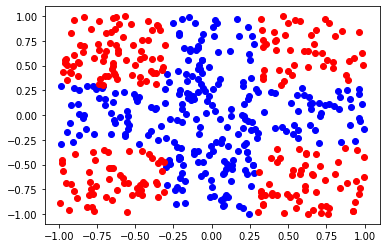

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### <font color='red'><center>**Modèle linéaire**</center></font>
KO

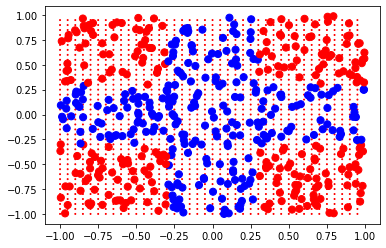

<Figure size 432x288 with 0 Axes>

In [23]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

model = ml.create_linear_model(2)

test_dataset = [[x1/20, x2/20] for x1 in range(-20, 20) for x2 in range(-20, 20)]
colors = ["blue" if output >= 0 else "red" for output in Y]


flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(Y)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*Y)

ml.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_float, c_int, c_int]
ml.train_classification_rosenblatt_rule_linear_model.restype = None
ml.train_classification_rosenblatt_rule_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs, 0.001, 10000, len(flattened_dataset_inputs))

predicted_outputs = []
for p in test_dataset:
    predicted_outputs_type = c_float * len(p)
    arr_predicted_outputs = predicted_outputs_type(*p)
    ml.predict_linear_model_classification.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_classification.restype = c_float

    d = ml.predict_linear_model_classification(model, arr_predicted_outputs)
    predicted_outputs.append(d)

predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c= predicted_outputs_colors, s=1)
plt.scatter([p[0] for p in X], [p[1] for p in X], c= colors, s=50)
plt.show()
plt.clf()

ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

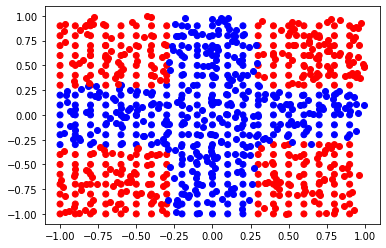

In [14]:
dataset_inputs = np.random.random((500, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in dataset_inputs])
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
init_tab = [2, 4, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]
my_lib.getXSize.argtypes = [c_void_p]
my_lib.restype = c_int
tmp_len = my_lib.getXSize(model)
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                      array_type_exp, c_float, c_int]
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                          0.1, 100000)
predicted_outputs = []
for p in test_dataset:
    array_size_P = len(p)
    array_type_P = c_float * array_size_P
    array_P = array_type_P(*p)
    my_lib.predict_mlp_model_classification.argtypes = [c_void_p, array_type_P]
    my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_classification(model, array_P)
    np_array = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_array[0])
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:, 1], color='blue')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:, 1], color='red')
plt.show()
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

***

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [24]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

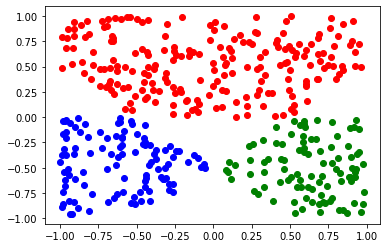

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### <font color='red'><center>**Modèle linéaire**</center></font>

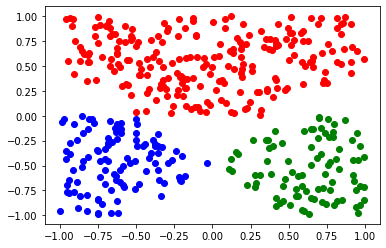

<Figure size 432x288 with 0 Axes>

In [26]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

model = ml.create_linear_model(3)

test_dataset = [[x1/20, x2/20] for x1 in range(-20, 20) for x2 in range(-20, 20)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in Y]

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

flattened_dataset_outputs = [] #only with array size-1
for p in Y:
  flattened_dataset_outputs.append(p[0])
  flattened_dataset_outputs.append(p[1])
  flattened_dataset_outputs.append(p[2])
    
dataset_expected_outputs_type = c_float * len(flattened_dataset_outputs)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*flattened_dataset_outputs)

ml.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_float, c_int, c_int]
ml.train_classification_rosenblatt_rule_linear_model.restype = None
ml.train_classification_rosenblatt_rule_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs, 0.001, 10000, len(flattened_dataset_inputs))

predicted_outputs = []
for p in test_dataset:
    predicted_outputs_type = c_float * len(p)
    arr_predicted_outputs = predicted_outputs_type(*p)
    ml.predict_linear_model_classification.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_classification.restype = c_float

    d = ml.predict_linear_model_classification(model, arr_predicted_outputs)
    predicted_outputs.append(d)
      
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

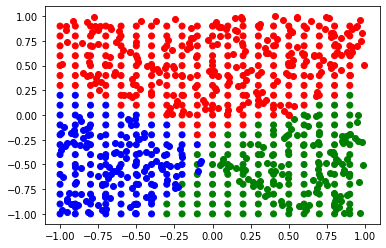

<Figure size 432x288 with 0 Axes>

In [19]:
dataset_inputs = np.random.random((500, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
                                     [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
                                     [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
                                     [0, 0, 0] for p in dataset_inputs])
init_tab = [2, 3]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in
          dataset_expected_outputs]
my_lib.getXSize.argtypes = [c_void_p]
my_lib.restype = c_int
tmp_len = my_lib.getXSize(model)
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
flattened_dataset_outputs = []
for p in dataset_expected_outputs:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(flattened_dataset_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*flattened_dataset_outputs)
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                      array_type_exp, c_float, c_int]
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                          0.001, 10000)
predicted_outputs = []
for p in test_dataset:
    array_size_P = len(p)
    array_type_P = c_float * array_size_P
    array_P = array_type_P(*p)
    my_lib.predict_mlp_model_classification.argtypes = [c_void_p, array_type_P]
    my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_classification(model, array_P)
    np_array = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_array)
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter(np.array(
    list(map(lambda elt: elt[1], filter(lambda c: dataset_expected_outputs[c[0]][0] == 1, enumerate(dataset_inputs)))))[
            :, 0], np.array(
    list(map(lambda elt: elt[1], filter(lambda c: dataset_expected_outputs[c[0]][0] == 1, enumerate(dataset_inputs)))))[
                   :, 1], color='blue')
plt.scatter(np.array(
    list(map(lambda elt: elt[1], filter(lambda c: dataset_expected_outputs[c[0]][1] == 1, enumerate(dataset_inputs)))))[
            :, 0], np.array(
    list(map(lambda elt: elt[1], filter(lambda c: dataset_expected_outputs[c[0]][1] == 1, enumerate(dataset_inputs)))))[
                   :, 1], color='red')
plt.scatter(np.array(
    list(map(lambda elt: elt[1], filter(lambda c: dataset_expected_outputs[c[0]][2] == 1, enumerate(dataset_inputs)))))[
            :, 0], np.array(
    list(map(lambda elt: elt[1], filter(lambda c: dataset_expected_outputs[c[0]][2] == 1, enumerate(dataset_inputs)))))[
                   :, 1], color='green')
plt.show()
plt.clf()

***

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [27]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

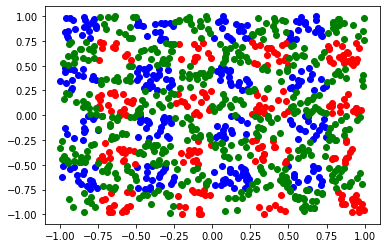

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### <font color='red'><center>**Modèle linéaire**</center></font>
KO

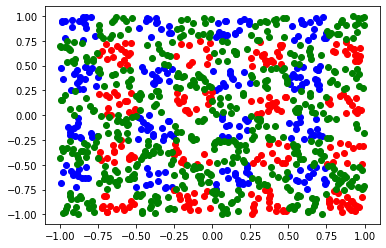

<Figure size 432x288 with 0 Axes>

In [29]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

model = ml.create_linear_model(3)

test_dataset = [[x1/20, x2/20] for x1 in range(-20, 20) for x2 in range(-20, 20)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in Y]

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)


flattened_dataset_outputs = [] #only with array size-1
for p in Y:
  flattened_dataset_outputs.append(p[0])
  flattened_dataset_outputs.append(p[1])
  flattened_dataset_outputs.append(p[2])
    
dataset_expected_outputs_type = c_float * len(flattened_dataset_outputs)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*flattened_dataset_outputs)

ml.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_float, c_int, c_int]
ml.train_classification_rosenblatt_rule_linear_model.restype = None
ml.train_classification_rosenblatt_rule_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs, 0.001, 10000, len(flattened_dataset_inputs))

predicted_outputs = []
for p in test_dataset:
    predicted_outputs_type = c_float * len(p)
    arr_predicted_outputs = predicted_outputs_type(*p)
    ml.predict_linear_model_classification.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_classification.restype = c_float

    d = ml.predict_linear_model_classification(model, arr_predicted_outputs)
    predicted_outputs.append(d)
      
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

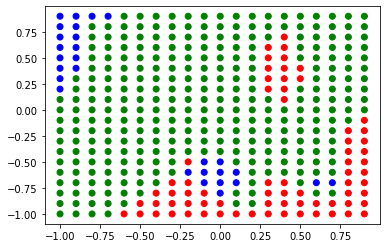

<Figure size 432x288 with 0 Axes>

In [20]:
dataset_inputs = np.random.random((1000, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1,
                                                                                                           0] if abs(
    p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in dataset_inputs])

X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(
    p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

init_tab = [2, 30, 23, 3]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in
          dataset_expected_outputs]
my_lib.getXSize.argtypes = [c_void_p]
my_lib.restype = c_int
tmp_len = my_lib.getXSize(model)
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
flattened_dataset_outputs = []
for p in dataset_expected_outputs:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(flattened_dataset_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*flattened_dataset_outputs)
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                      array_type_exp, c_float, c_int]
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                          0.001, 100000)
predicted_outputs = []
for p in test_dataset:
    array_size_P = len(p)
    array_type_P = c_float * array_size_P
    array_P = array_type_P(*p)
    my_lib.predict_mlp_model_classification.argtypes = [c_void_p, array_type_P]
    my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_classification(model, array_P)
    np_array = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_array)
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
"""plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:, 1],
            color='blue')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:, 1], color='red')
plt.scatter(np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:, 0],
            np.array(list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:, 1],
            color='green')"""
plt.show()
plt.clf()

***
***

## <center>Régression</center>

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [30]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

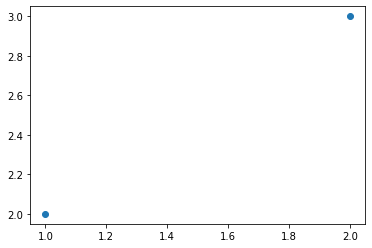

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### <font color='red'><center>**Modèle linéaire**</center></font>

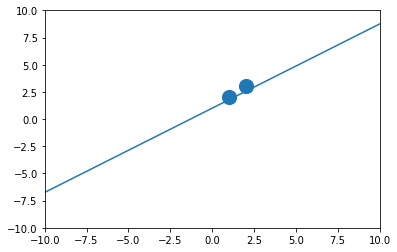

In [48]:
def display_flattened_dataset_inputs_regression(test_dataset_inputs,predicted_outputs,dataset_inputs, dataset_expected_outputs):
    plt.plot(test_dataset_inputs, predicted_outputs)
    plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
    plt.axis([-10, 10, -10, 10])
    plt.show()
    
    
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

model = ml.create_linear_model(1)

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(float(p[0]))

flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(Y)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*Y)

ml.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_int,c_int]
ml.train_regression_pseudo_inverse_linear_model.restypes = None
ml.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs,len(flattened_dataset_inputs), len(Y))

test_dataset_inputs = []
for i in range(-10, 11):
    test_dataset_inputs.append(float(i))
    
predicted_outputs = []
for p in test_dataset_inputs:
    predicted_outputs_type = c_float * len([p])
    arr_predicted_outputs = predicted_outputs_type(*[p])
    
    ml.predict_linear_model_regression.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_regression.restype = c_float

    d = ml.predict_linear_model_regression(model, arr_predicted_outputs)
    predicted_outputs.append(d)
    
display_flattened_dataset_inputs_regression(test_dataset_inputs,predicted_outputs,X,Y)
    
ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

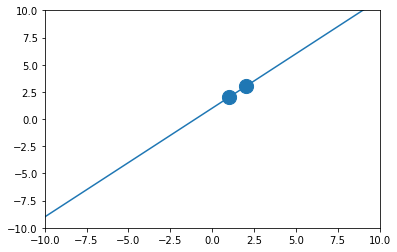

In [21]:
dataset_inputs = np.array([
    [1],
    [2]
])

dataset_expected_outputs = np.array([
    2,
    3
])

init_tab = [1, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                  array_type_exp, c_float, c_int]
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                      0.001, 100000)
test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = []
for p in test_dataset_inputs:
    array_size_P = len([p])
    array_type_P = c_float * array_size_P
    array_P = array_type_P(*[p])
    my_lib.predict_mlp_model_regression.argtypes = [c_void_p, array_type_P]
    my_lib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_regression(model, array_P)
    predicted_outputs.append(tmp[0])
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

***

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [49]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

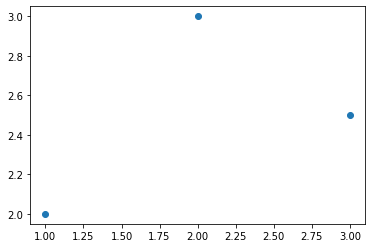

<Figure size 432x288 with 0 Axes>

In [50]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### <font color='red'><center>Modèle linéaire</center></font>

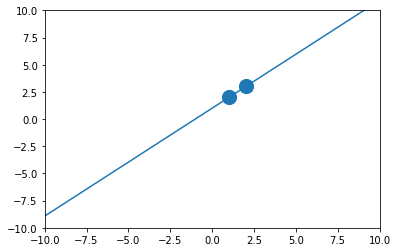

In [84]:
def display_flattened_dataset_inputs_regression(test_dataset_inputs,predicted_outputs,dataset_inputs, dataset_expected_outputs):
    plt.plot(test_dataset_inputs, predicted_outputs)
    plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
    plt.axis([-10, 10, -10, 10])
    plt.show()
    
    
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

model = ml.create_linear_model(1)

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(float(p[0]))

flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(Y)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*Y)

ml.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_int,c_int]
ml.train_regression_pseudo_inverse_linear_model.restypes = None
ml.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs,len(flattened_dataset_inputs), len(Y))

test_dataset_inputs = []
for i in range(-10, 11):
    test_dataset_inputs.append(float(i))
    
predicted_outputs = []
for p in test_dataset_inputs:
    predicted_outputs_type = c_float * len([p])
    arr_predicted_outputs = predicted_outputs_type(*[p])
    
    ml.predict_linear_model_regression.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_regression.restype = c_float

    d = ml.predict_linear_model_regression(model, arr_predicted_outputs)
    predicted_outputs.append(d)
    
display_flattened_dataset_inputs_regression(test_dataset_inputs,predicted_outputs,X,Y)
    
ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

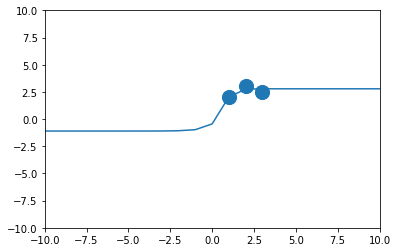

In [22]:
dataset_inputs = np.array([
    [1],
    [2],
    [3]
])

dataset_expected_outputs = np.array([
    2,
    3,
    2.5
])

x = [1, 3, 1]
array_size_x = len(x)
array_type_x = c_int * array_size_x
array_x = array_type_x(*x)
my_lib.create_mlp_model.argtypes = [array_type_x, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(array_x, int(array_size_x))
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                  array_type_exp, c_float, c_int]
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                      0.002, 100000)
test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len([p])
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*[p])
    my_lib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    my_lib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_regression(model, arrP)
    predicted_outputs.append(tmp[0])
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

***

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [85]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

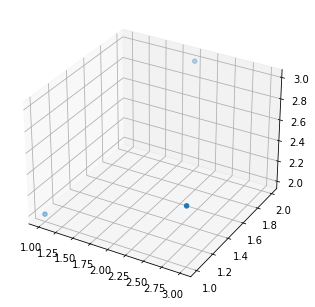

<Figure size 432x288 with 0 Axes>

In [86]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### <font color='red'><center>Modèle linéaire</center></font>

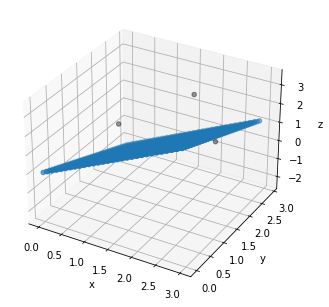

<Figure size 432x288 with 0 Axes>

In [87]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

model = ml.create_linear_model(2)

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(float(p[0]))

flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(Y)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*Y)

ml.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_int,c_int]
ml.train_regression_pseudo_inverse_linear_model.restypes = None
ml.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs,len(flattened_dataset_inputs), len(Y))


test_dataset_inputs = np.array([[a / 10, b / 10] for a in range(30) for b in range(30)])
   
predicted_outputs = []
for p in test_dataset_inputs:
    predicted_outputs_type = c_float * len(p)
    arr_predicted_outputs = predicted_outputs_type(*p)
    
    ml.predict_linear_model_regression.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_regression.restype = c_float

    d = ml.predict_linear_model_regression(model, arr_predicted_outputs)
    predicted_outputs.append(d)
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_dataset_inputs[:,0], test_dataset_inputs[:,1], predicted_outputs)
ax.scatter(X[:,0],X[:,1],Y, c="black", alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.clf()

ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

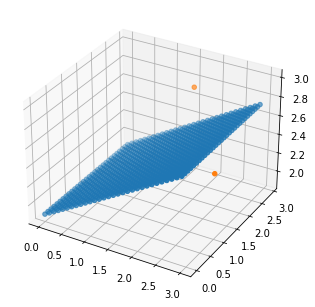

<Figure size 432x288 with 0 Axes>

In [23]:
from mpl_toolkits.mplot3d import Axes3D

dataset_inputs = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
dataset_expected_outputs = np.array([
      2,
      3,
      2.5
])


init_tab = [1, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                  array_type_exp, c_float, c_int]
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                      0.001, 10000)
test_dataset_inputs = np.array([[a / 10, b / 10] for a in range(30) for b in range(30)])
predicted_outputs = []
for p in test_dataset_inputs:
    array_size_P = len(p)
    array_type_P = c_float * array_size_P
    array_P = array_type_P(*p)
    my_lib.predict_mlp_model_regression.argtypes = [c_void_p, array_type_P]
    my_lib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_regression(model, array_P)
    predicted_outputs.append(tmp[0])
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.scatter(test_dataset_inputs[:, 0], test_dataset_inputs[:, 1], predicted_outputs)
ax.scatter(dataset_inputs[:, 0], dataset_inputs[:, 1], dataset_expected_outputs)
fig.add_axes(ax)
plt.show()
plt.clf()

***

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [88]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

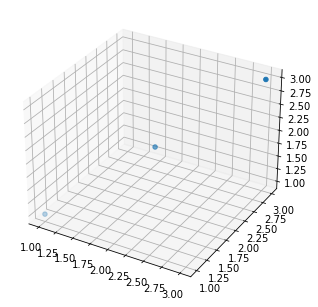

<Figure size 432x288 with 0 Axes>

In [89]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### <font color='red'><center>Modèle linéaire</center></font>

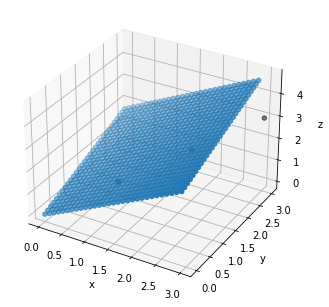

<Figure size 432x288 with 0 Axes>

In [95]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

model = ml.create_linear_model(2)

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(float(p[0]))

flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(Y)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*Y)

ml.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_int,c_int]
ml.train_regression_pseudo_inverse_linear_model.restypes = None
ml.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs,len(flattened_dataset_inputs), len(Y))


test_dataset_inputs = np.array([[a / 10, b / 10] for a in range(30) for b in range(30)])
   
predicted_outputs = []
for p in test_dataset_inputs:
    predicted_outputs_type = c_float * len(p)
    arr_predicted_outputs = predicted_outputs_type(*p)
    
    ml.predict_linear_model_regression.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_regression.restype = c_float

    d = ml.predict_linear_model_regression(model, arr_predicted_outputs)
    predicted_outputs.append(d)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_dataset_inputs[:,0], test_dataset_inputs[:,1], predicted_outputs)
ax.scatter(X[:,0],X[:,1],Y, c="black", alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.clf()

ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

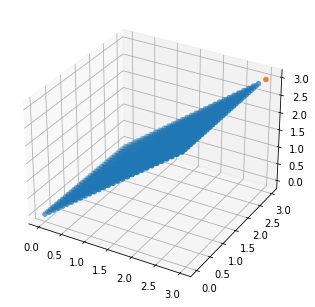

<Figure size 432x288 with 0 Axes>

In [24]:
from mpl_toolkits.mplot3d import Axes3D

dataset_inputs = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
dataset_expected_outputs = np.array([
      1,
      2,
      3
])

init_tab = [1, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                  array_type_exp, c_float, c_int]
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                      0.001, 10000)
test_dataset_inputs = np.array([[a / 10, b / 10] for a in range(30) for b in range(30)])
predicted_outputs = []
for p in test_dataset_inputs:
    array_size_P = len(p)
    array_type_P = c_float * array_size_P
    array_P = array_type_P(*p)
    my_lib.predict_mlp_model_regression.argtypes = [c_void_p, array_type_P]
    my_lib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_regression(model, array_P)
    predicted_outputs.append(tmp[0])
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.scatter(test_dataset_inputs[:, 0], test_dataset_inputs[:, 1], predicted_outputs)
ax.scatter(dataset_inputs[:, 0], dataset_inputs[:, 1], dataset_expected_outputs)
fig.add_axes(ax)
plt.show()
plt.clf()

***

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [96]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

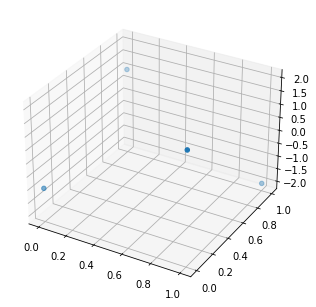

<Figure size 432x288 with 0 Axes>

In [97]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### <font color='red'><center>Modèle linéaire</center></font>

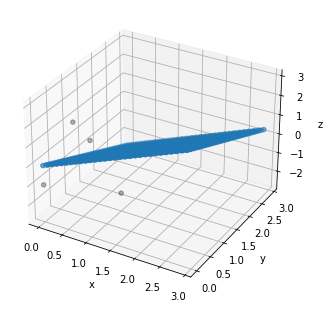

<Figure size 432x288 with 0 Axes>

In [98]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

model = ml.create_linear_model(2)

flattened_dataset_inputs = []
for p in X:
  flattened_dataset_inputs.append(float(p[0]))

flattened_dataset_inputs_type = c_float * len(flattened_dataset_inputs)
arr_flattened_dataset_inputs = flattened_dataset_inputs_type(*flattened_dataset_inputs)

dataset_expected_outputs_type = c_float * len(Y)
arr_dataset_expected_outputs = dataset_expected_outputs_type(*Y)

ml.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), flattened_dataset_inputs_type, dataset_expected_outputs_type, c_int,c_int]
ml.train_regression_pseudo_inverse_linear_model.restypes = None
ml.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset_expected_outputs,len(flattened_dataset_inputs), len(Y))


test_dataset_inputs = np.array([[a / 10, b / 10] for a in range(30) for b in range(30)])
   
predicted_outputs = []
for p in test_dataset_inputs:
    predicted_outputs_type = c_float * len(p)
    arr_predicted_outputs = predicted_outputs_type(*p)
    
    ml.predict_linear_model_regression.argtypes = [POINTER(c_float), predicted_outputs_type]
    ml.predict_linear_model_regression.restype = c_float

    d = ml.predict_linear_model_regression(model, arr_predicted_outputs)
    predicted_outputs.append(d)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_dataset_inputs[:,0], test_dataset_inputs[:,1], predicted_outputs)
ax.scatter(X[:,0],X[:,1],Y, c="black", alpha=0.3) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.clf()

ml.destroy_linear_model(model)

### <font color='red'><center>PMC</center></font>

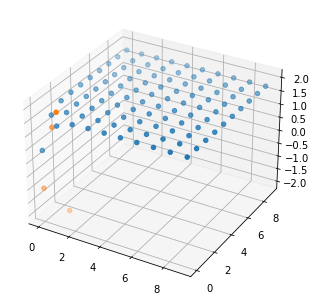

<Figure size 432x288 with 0 Axes>

In [30]:
from mpl_toolkits.mplot3d import Axes3D

dataset_inputs = np.array([
    [1, 0],
    [0, 1],
    [1, 1],
    [0, 0],
])

dataset_expected_outputs = np.array([
    2,
    1,
    -2,
    -1
])

init_tab = [2, 2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                  array_type_exp, c_float, c_int]
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                      0.0001, 100000)
test_dataset_inputs = np.array([[a, b] for a in range(10) for b in range(10)])
predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len(p)
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*p)
    my_lib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    my_lib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp = my_lib.predict_mlp_model_regression(model, arrP)
    predicted_outputs.append(tmp[0])
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.scatter(test_dataset_inputs[:, 0], test_dataset_inputs[:, 1], predicted_outputs)
ax.scatter(dataset_inputs[:, 0], dataset_inputs[:, 1], dataset_expected_outputs)
fig.add_axes(ax)
plt.show()
plt.clf()